In [5]:
%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [7]:
df_train=pd.read_csv("train_aWnotuB.csv")
df_test= pd.read_csv("test_BdBKkAj_L87Nc3S.csv")
df_submission=pd.read_csv("sample_submission_KVKNmI7.csv")


In [8]:
df_train.dtypes

DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object

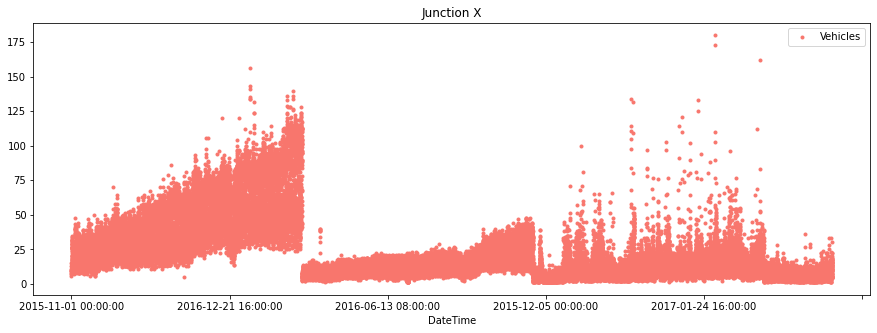

In [9]:
df1 = df_train
dff=df1[['DateTime','Vehicles']]
df1['DateTime'] = pd.to_datetime(df1['DateTime'])
df1.set_index('DateTime',inplace=True)

color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
dff.plot(x='DateTime',y='Vehicles',style='.', figsize=(15,5), color=color_pal[0], title='Junction X')

In [10]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['Junction']=df['Junction']
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','Junction']]
    if label:
        y = df[label]
        return X, y
    return X

In [11]:
#Making features on training model
X_train, y_train = create_features(df1, label='Vehicles')

In [12]:
X_train

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Junction
DateTime,,,,,,,,,
2015-11-01 00:00:00,0,6,4,11,2015,305,1,44,1
2015-11-01 01:00:00,1,6,4,11,2015,305,1,44,1
2015-11-01 02:00:00,2,6,4,11,2015,305,1,44,1
2015-11-01 03:00:00,3,6,4,11,2015,305,1,44,1
2015-11-01 04:00:00,4,6,4,11,2015,305,1,44,1
...,...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,19,4,2,6,2017,181,30,26,4
2017-06-30 20:00:00,20,4,2,6,2017,181,30,26,4
2017-06-30 21:00:00,21,4,2,6,2017,181,30,26,4


In [13]:
df2=df_test
df2['DateTime']=pd.to_datetime(df2['DateTime'])
df2.set_index('DateTime',inplace=True)
df2.drop(['ID'],inplace=True,axis=1)

In [14]:
X_test=create_features(df2)

In [15]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
       verbose=True)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

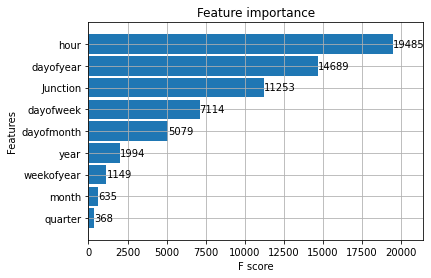

In [16]:


_ = plot_importance(reg, height=0.9)



,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Junction
DateTime,,,,,,,,,
2015-11-01 00:00:00,0,6,4,11,2015,305,1,44,1
2015-11-01 01:00:00,1,6,4,11,2015,305,1,44,1
2015-11-01 02:00:00,2,6,4,11,2015,305,1,44,1
2015-11-01 03:00:00,3,6,4,11,2015,305,1,44,1
2015-11-01 04:00:00,4,6,4,11,2015,305,1,44,1
...,...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,19,4,2,6,2017,181,30,26,4
2017-06-30 20:00:00,20,4,2,6,2017,181,30,26,4
2017-06-30 21:00:00,21,4,2,6,2017,181,30,26,4


In [10]:
predict_test = reg.predict(X_test)
df_submission.Vehicles = predict_test
df_submission.to_csv('solution.csv',index = False)

In [12]:
df2

,Junction
DateTime,
2017-07-01 00:00:00,1
2017-07-01 01:00:00,1
2017-07-01 02:00:00,1
2017-07-01 03:00:00,1
2017-07-01 04:00:00,1
...,...
2017-10-31 19:00:00,4
2017-10-31 20:00:00,4
2017-10-31 21:00:00,4


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Junction
DateTime,,,,,,,,,
2017-07-01 00:00:00,0,5,3,7,2017,182,1,26,1
2017-07-01 01:00:00,1,5,3,7,2017,182,1,26,1
2017-07-01 02:00:00,2,5,3,7,2017,182,1,26,1
2017-07-01 03:00:00,3,5,3,7,2017,182,1,26,1
2017-07-01 04:00:00,4,5,3,7,2017,182,1,26,1
...,...,...,...,...,...,...,...,...,...
2017-10-31 19:00:00,19,1,4,10,2017,304,31,44,4
2017-10-31 20:00:00,20,1,4,10,2017,304,31,44,4
2017-10-31 21:00:00,21,1,4,10,2017,304,31,44,4
